In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os 
os.chdir('/content/drive/My Drive/Mestrado/2021.1/Redes Neurais Artificiais/RNA/')

Mounted at /content/drive


In [2]:
from models import utils, metrics, plots, pipelineRegressor
from models.regressors.RBFRegressor import *

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Artificial I

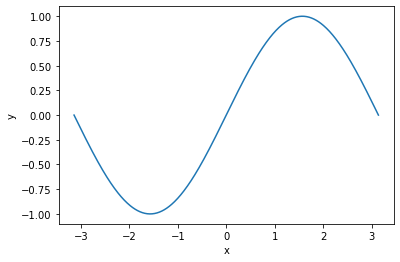

In [3]:
x = np.linspace(-np.pi, np.pi, 500)
y = np.sin(x)
df_artificial_1 =  pd.DataFrame(data=zip(x,y), columns =['x', 'target'])
plt.plot(df_artificial_1['x'], df_artificial_1['target'])
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

In [4]:
pipe = pipelineRegressor.make_pipeline(n_realizations = 20, model_name='RBFRegressor')

mean_mse_1, mean_rmse_1, desvio_padrao_mse_1, desvio_padrao_rmse_1, dict_realizations_1 = pipe.run_realizations(
    
    df=df_artificial_1, 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10], 'sigma': [0.1, 2, 3]},
    col_target='target', 
    train_size=0.8, 
    stratify=None, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 0
Start Grid Search k-fold: 5
MSE: 0.0003737798105434358
RMSE: 0.019333385904787496
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 1
Start Grid Search k-fold: 5
MSE: 0.00018388679973403265
RMSE: 0.013560486707122007
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 2
Start Grid Search k-fold: 5
MSE: 3.416381211301582e-06
RMSE: 0.0018483455335249364
-----------------------------------------------------------------

In [11]:
print('MSE:', '{:f}'.format(mean_mse_1))
print(f'Desvio Padrão MSE: {desvio_padrao_mse_1}')
print(f'\nRMSE: {mean_rmse_1}')
print(f'Desvio Padrão RMSE: {desvio_padrao_rmse_1}')

MSE: 0.000087
Desvio Padrão MSE: 0.00011042369193391949

RMSE: 0.007645713210560767
Desvio Padrão RMSE: 0.005521708434081192


### Superficie de Decisão

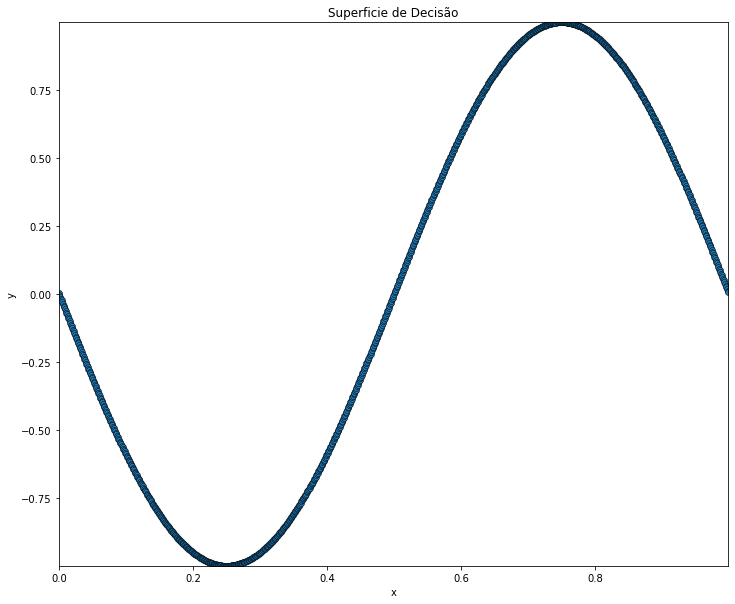

In [13]:
# Selecionando a realização que teve menor MSE

menor_error = np.inf
num_best_realization = np.inf

for n_realization in dict_realizations_1.keys():
    if dict_realizations_1[n_realization]['mse'] < menor_error:
        menor_error = dict_realizations_1[n_realization]['mse']
        num_best_realization = n_realization
        
best_realization = dict_realizations_1[num_best_realization]

best_regressor_1 = best_realization['regressor']
df_train = best_realization['train_data']
df_test = best_realization['test_data'].drop(['predict'], axis=1)

df_superficie_1 = pd.concat([df_train, df_test]).reset_index(drop=True)

plots.plot_decision_boundary(
    
    df_superficie_1,
    list_features = ['x'],
    col_target='target',
    model = best_regressor_1,
    h=.001,
    task='regressor'
)

#plt.savefig('superficie_decisao_1_com_ruido.png')

### Abalone

In [20]:
df_abalone = pd.read_csv('./datasets/abalone/abalone.csv')
df_abalone['target'] = df_abalone.Rings + 1.5
df_abalone.drop(['Rings', 'Sex'], axis=1, inplace=True)

In [21]:
df_abalone

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,target
0,0.46,0.36,0.10,0.51,0.22,0.10,0.15,16.50
1,0.35,0.27,0.09,0.23,0.10,0.05,0.07,8.50
2,0.53,0.42,0.14,0.68,0.26,0.14,0.21,10.50
3,0.44,0.36,0.12,0.52,0.22,0.11,0.15,11.50
4,0.33,0.26,0.08,0.20,0.09,0.04,0.06,8.50
...,...,...,...,...,...,...,...,...
4172,0.56,0.45,0.17,0.89,0.37,0.24,0.25,12.50
4173,0.59,0.44,0.14,0.97,0.44,0.21,0.26,11.50
4174,0.60,0.47,0.20,1.18,0.53,0.29,0.31,10.50
4175,0.62,0.48,0.15,1.09,0.53,0.26,0.30,11.50


In [24]:
pipe = pipelineRegressor.make_pipeline(n_realizations = 20, model_name='RBFRegressor')

mean_mse_2, mean_rmse_2, desvio_padrao_mse_2, desvio_padrao_rmse_2, dict_realizations_2 = pipe.run_realizations(
    
    df=df_abalone, 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [5, 3, 10], 'sigma': [0.1, 2, 3]},
    col_target='target', 
    train_size=0.8, 
    stratify=None, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 0
Start Grid Search k-fold: 5
MSE: 6.55704205388237
RMSE: 2.56067218789957
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 1
Start Grid Search k-fold: 5
MSE: 5.4711126015483105
RMSE: 2.3390409576465974
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 2
Start Grid Search k-fold: 5
MSE: 5.571637058579385
RMSE: 2.3604315407525345
---------------------------------------------------------------------------------------

In [25]:
print('MSE:', '{:f}'.format(mean_mse_2))
print(f'Desvio Padrão MSE: {desvio_padrao_mse_2}')
print(f'\nRMSE: {mean_rmse_2}')
print(f'Desvio Padrão RMSE: {desvio_padrao_rmse_2}')

MSE: 6.044677
Desvio Padrão MSE: 0.746749701618618

RMSE: 2.454187239437402
Desvio Padrão RMSE: 0.1509339925382814


### Electric Motor Temperature

In [78]:
df_eletric = pd.read_csv("./datasets/eletric/measures_v2.csv")
df_eletric['target'] = df_eletric['motor_speed'].values.reshape(-1, 1)
df_eletric.drop(['profile_id', 'motor_speed'], axis=1, inplace=True)
df_eletric.dropna(inplace=True)

In [79]:
len(df_eletric)

1330816

In [ ]:
pipe = pipelineRegressor.make_pipeline(n_realizations = 5, model_name='RBFRegressor')

mean_mse_3, mean_rmse_3, desvio_padrao_mse_3, desvio_padrao_rmse_3, dict_realizations_3 = pipe.run_realizations(
    
    df=df_eletric, 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [10, 50], 'sigma': [5, 50]},
    col_target='target', 
    train_size=0.8, 
    stratify=None, 
    normalize=True
)

In [ ]:
print('MSE:', '{:f}'.format(mean_mse_3))
print(f'Desvio Padrão MSE: {desvio_padrao_mse_3}')
print(f'\nRMSE: {mean_rmse_3}')
print(f'Desvio Padrão RMSE: {desvio_padrao_rmse_3}')

### Car Fuel Consumption

In [63]:
df_consume = pd.read_csv("./datasets/car/measurements.csv")
df_consume['gas_type'] = df_consume['gas_type'].map({'SP98': 1, 'E10': 0})
df_consume['distance'] = df_consume['distance'].apply(lambda x: str(x).replace(',', '.'))
df_consume['distance'] = df_consume['distance'].astype(float)
df_consume['temp_inside'] = df_consume['temp_inside'].apply(lambda x: str(x).replace(',', '.'))
df_consume['temp_inside'] = df_consume['temp_inside'].astype(float)
df_consume['consume'] = df_consume['consume'].apply(lambda x: str(x).replace(',', '.'))
df_consume['consume'] = df_consume['consume'].astype(float)
df_consume['target'] = df_consume['consume']
df_consume.drop(['consume', 'specials', 'refill liters', 'refill gas'], axis=1, inplace=True)
df_consume.dropna(inplace=True)
df_consume

,distance,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,target
0,28.00,26,21.50,12,0,0,0,0,5.00
1,12.00,30,21.50,13,0,0,0,0,4.20
2,11.20,38,21.50,15,0,0,0,0,5.50
3,12.90,36,21.50,14,0,0,0,0,3.90
4,18.50,46,21.50,15,0,0,0,0,4.50
...,...,...,...,...,...,...,...,...,...
383,16.00,39,24.50,18,1,0,0,0,3.70
384,16.10,38,25.00,31,1,1,0,0,4.30
385,16.00,45,25.00,19,1,0,0,0,3.80
386,15.40,42,25.00,31,1,1,0,0,4.60


In [64]:
pipe = pipelineRegressor.make_pipeline(n_realizations = 20, model_name='RBFRegressor')

mean_mse_4, mean_rmse_4, desvio_padrao_mse_4, desvio_padrao_rmse_4, dict_realizations_4 = pipe.run_realizations(
    
    df=df_consume, 
    k_fold=5, 
    param_grid={'qt_neurons_hide': [50, 100, 20, 10], 'sigma': [0.1, 5, 50, 20, 3]},
    col_target='target', 
    train_size=0.8, 
    stratify=None, 
    normalize=True
)




-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 0
Start Grid Search k-fold: 5
MSE: 0.5879922458968616
RMSE: 0.7668065244224658
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 1
Start Grid Search k-fold: 5
MSE: 2.283188770288535
RMSE: 1.5110224254750606
-----------------------------------------------------------------------------------------------------------------------------



-----------------------------------------------------------------------------------------------------------------------------
RealizaÃ§Ã£o: 2
Start Grid Search k-fold: 5
MSE: 0.4322627378869573
RMSE: 0.6574669101079972
-----------------------------------------------------------------------------------

In [65]:
print('MSE:', '{:f}'.format(mean_mse_4))
print(f'Desvio Padrão MSE: {desvio_padrao_mse_4}')
print(f'\nRMSE: {mean_rmse_4}')
print(f'Desvio Padrão RMSE: {desvio_padrao_rmse_4}')

MSE: 1.073335
Desvio Padrão MSE: 0.5230073671679334

RMSE: 1.0079253741385248
Desvio Padrão RMSE: 0.24585376091012723
